# Financial Data Analysis with Python

### Instructor: Luping Yu

### Apr 12, 2022

***
## Lecture 06. Plotting and Visualization

Making informative visualizations (sometimes called plots) is one of the most important tasks in data analysis.

It may be a part of the exploratory process:
* help identify outliers or needed data transformations.
* a way of generating ideas for models.

Python has many add-on libraries for making static or dynamic visualizations, but we will be mainly focused on **matplotlib**. It is a plotting package designed for creating (mostly **two-dimensional**) publication-quality plots.

The project was started in 2002 to enable a *MATLAB-like* plotting interface in Python. **matplotlib** supports various GUI backends on all operating systems and additionally can export visualizations to all of the common vector and raster graphics formats (PDF, SVG, JPG, PNG, BMP, GIF, etc.).

The simplest way to follow the code examples in the chapter is to use interactive plotting in the Jupyter notebook. To set this up, execute the following statement in a Jupyter notebook:

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

***
### Plotting with pandas

In pandas we may have multiple columns of data, along with row and column labels. pandas itself has built-in methods that simplify creating visualizations from DataFrame and Series objects. 

### Line Plots
Series and DataFrame each have a plot attribute for making some basic plot types. By default, **plot( )** makes line plots:

In [5]:
import numpy as np
import pandas as pd

s = pd.Series(np.random.rand(10), index=np.arange(0, 100, 10))
# numpy.random.rand(): 生成随机数
# np.arange(): 生成等差数列

s

0     0.992407
10    0.221377
20    0.281682
30    0.161613
40    0.308816
50    0.302113
60    0.042494
70    0.029292
80    0.448185
90    0.500641
dtype: float64

If everything is set up right, a simple line plot should appear:

<AxesSubplot:>

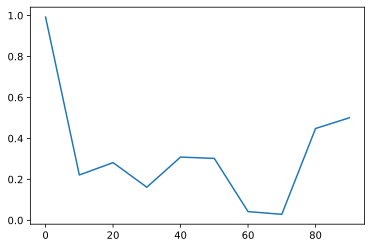

In [6]:
s.plot()

The Series object's **index** is passed to matplotlib for plotting on the **x-axis**, though you can disable this by passing use_index=False.

<AxesSubplot:>

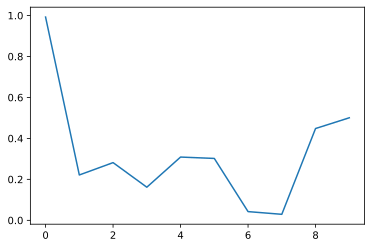

In [7]:
s.plot(use_index=False)

The x-axis ticks and limits can be adjusted with the **xticks** and **xlim** options, and y-axis respectively with **yticks** and **ylim**. See the following table for a full listing of plot options. I'll comment on a few more of them throughout this section and leave the rest to you to explore.

* <u>Series.plot method arguments</u>:

|Argument | Description |
|:- | :- | 
|ax | matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot
|style | Style string, like 'ko--', to be passed to matplotlib
|alpha | The plot fill opacity (from 0 to 1)
|kind | Can be 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'
|logy | Use logarithmic scaling on the y-axis
|use_index | Use the object index for tick labels
|rot | Rotation of tick labels (0 through 360)
|xticks | Values to use for x-axis ticks
|yticks | Values to use for y-axis ticks
|xlim | x-axis limits (e.g., [0, 10])
|ylim | y-axis limits
|grid | Display axis grid (on by default)

<u>DataFrame</u>'s plot method plots each of its columns as a different line on the same subplot, creating a legend automatically:

In [8]:
df = pd.DataFrame(np.random.rand(10, 2),
                  columns=['A', 'B'],
                  index=np.arange(0, 100, 10))

df

,A,B
0,0.888038,0.805617
10,0.533807,0.672393
20,0.207537,0.657805
30,0.340372,0.300953
40,0.803540,0.305150
50,0.355736,0.741251
60,0.000411,0.703836
70,0.575083,0.920408
80,0.887277,0.347950
90,0.059610,0.019449


<AxesSubplot:title={'center':'XMU'}>

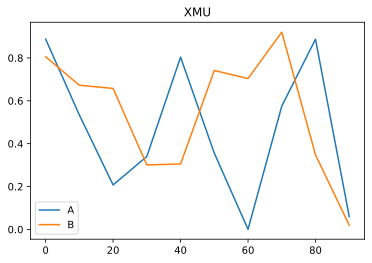

In [10]:
df.plot(title='XMU')

DataFrame has a number of options allowing some flexibility with how the columns are handled; for example, whether to plot them all on the same subplot or to create separate subplots.

* <u>DataFrame-specific plot arguments</u>

|Argument | Description |
|:- | :- | 
|subplots | Plot each DataFrame column in a separate subplot
|sharex | If subplots=True, share the same x-axis, linking ticks and limits
|sharey | If subplots=True, share the same y-axis
|figsize | Size of figure to create as tuple
|title | Plot title as string
|legend | Add a subplot legend (Trueby default)
|sort_columns | Plot columns in alphabetical order; by default uses existing column order


***

### Bar Plots

The plot attribute contains a "family" of methods for different plot types. For example, df.plot( ) is equivalent to df.plot.line( ).

The plot.bar( ) and plot.barh( ) make *vertical* and *horizontal* **bar plots**, respectively. In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) ticks:

In [11]:
data = pd.Series(np.random.rand(7), index=list('abcdefg'))

data

a    0.524379
b    0.437698
c    0.224687
d    0.567518
e    0.759248
f    0.043557
g    0.729758
dtype: float64

<AxesSubplot:>

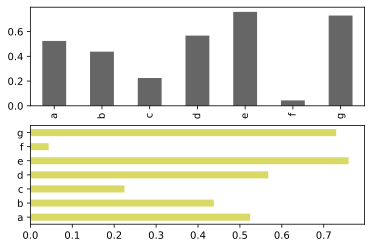

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1)
# 两行一列的子图（子图的行数，子图的列数）

data.plot.bar(ax=axes[0], color='k', alpha=0.6)

data.plot.barh(ax=axes[1], color='y', alpha=0.6)

The options color='k' and alpha=0.7 set the color of the plots to black and use partial transparency on the filling.

With a <u>DataFrame</u>, bar plots group the values in each row together in a group in bars, side by side, for each value.

In [21]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='XMU'))

df

XMU,A,B,C,D
one,0.622380,0.010570,0.101705,0.498777
two,0.086290,0.108785,0.635175,0.492623
three,0.240348,0.962768,0.690064,0.064669
four,0.261365,0.016232,0.775281,0.520804
five,0.624889,0.880886,0.548503,0.851502
six,0.162463,0.890787,0.143053,0.357835


By default the columns are removed from the DataFrame, though you can leave them in:

<AxesSubplot:>

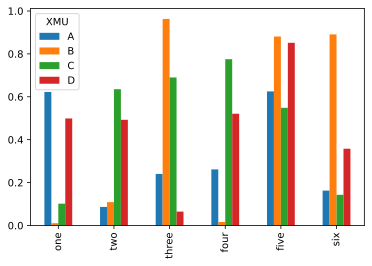

In [22]:
df.plot.bar()

Note that the name "XMU" on the DataFrame’s columns is used to title the legend.

We create stacked bar plots from a DataFrame by passing stacked=True, resulting in the value in each row being stacked together:

<AxesSubplot:>

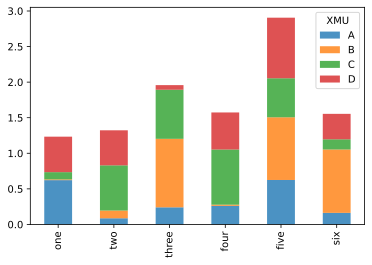

In [25]:
df.plot.bar(stacked=True, alpha=0.8)

Returning to the <u>tips.csv</u> used earlier in <u>Lecture 04</u>, suppose we wanted to make a stacked bar plot showing the percentage of data points for each party size on each day.

We load the data using read_csv and make a *cross-tabulation* by day and party size:

In [26]:
tips = pd.read_csv('examples/tips.csv')

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [28]:
party_counts = pd.crosstab(tips['day'], tips['size'])

party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


<AxesSubplot:xlabel='day'>

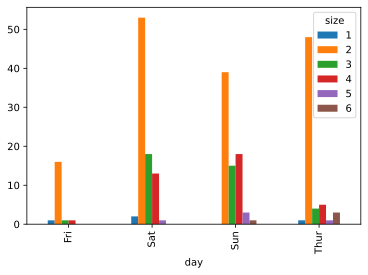

In [29]:
party_counts.plot.bar()

So you can see that party sizes appear to increase on the weekend in this dataset.

With data that requires aggregation or summarization before making a plot, using the **seaborn** package can make things much simpler. Let's look now at the tipping percentage by day with seaborn:

In [30]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

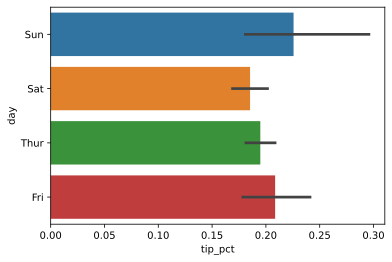

In [31]:
import seaborn as sns

sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Plotting functions in seaborn take a data argument, which can be a pandas DataFrame. The other arguments refer to column names.

Because there are multiple observations for each value in the day, the bars are the *average value* of tip_pct. The black lines drawn on the bars represent the **95% confidence interval** (this can be configured through optional arguments).

seaborn.barplot has a **hue** option that enables us to split by an additional categorical value:

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

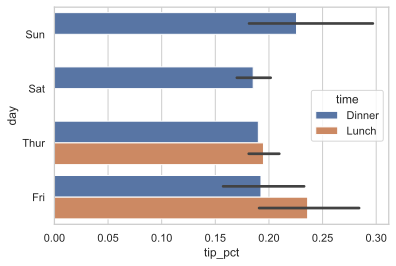

In [34]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

Notice that seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors. You can switch between different plot appearances using seaborn.set:

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

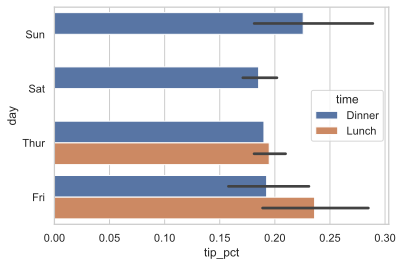

In [36]:
sns.set(style="whitegrid")
#sns.reset_orig()

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

***

### Facet Grids and Categorical Data
What about datasets where we have additional grouping dimensions? One way to visualize data with many categorical variables is to use a **catplot**.

Seaborn has a useful built-in function **catplot** that simplifies making many kinds of plots:

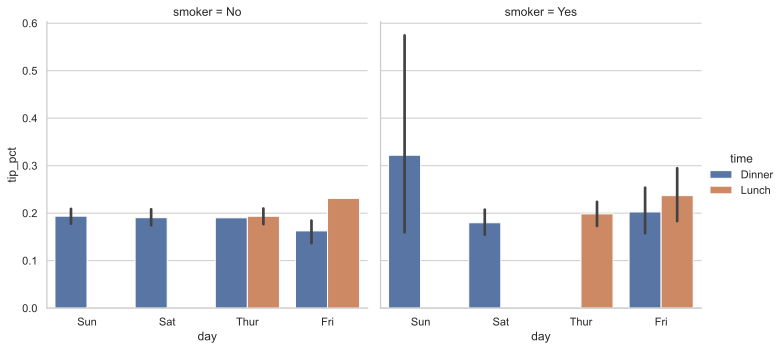

In [37]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips)

Instead of grouping by 'time' by different bar colors within a facet, we can also expand the facet grid by adding one row per time value:

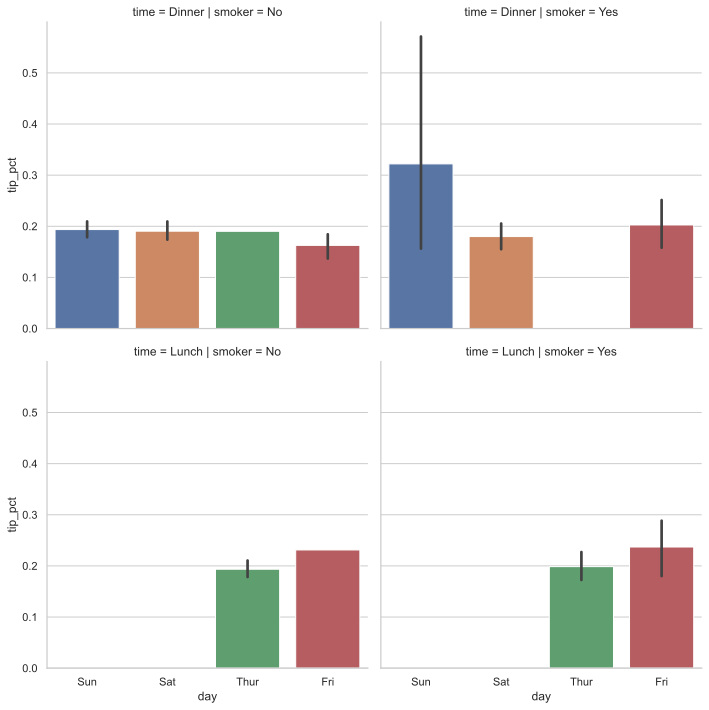

In [26]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips)

**catplot** supports other plot types that may be useful depending on what you are trying to display.

For example, box plots (which show the <u>median, quartiles, and outliers</u>) can be an effective visualization type:

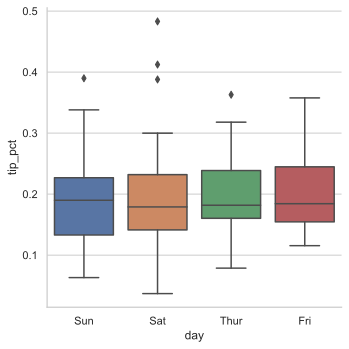

In [27]:
sns.catplot(x='day', y='tip_pct', kind='box', data=tips[tips.tip_pct < 0.5])

***
### Histograms and Density Plots

A histogram is a kind of bar plot that gives a **discretized display of value frequency**. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted.

Using the tipping data from before, we can make a histogram of tip percentages of the total bill using the **plot.hist** method on the Series:

<AxesSubplot:ylabel='Frequency'>

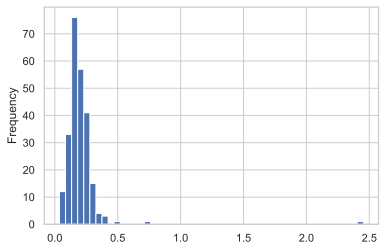

In [38]:
tips['tip_pct'].plot.hist(bins=50)

A related plot type is a **density plot**, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data:

<AxesSubplot:ylabel='Density'>

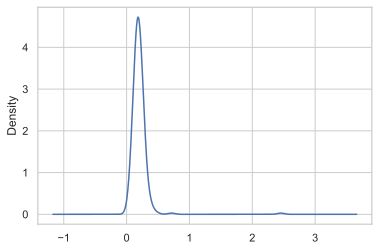

In [29]:
tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier through its **histplot** method, which can plot both a histogram and a continuous density estimate *simultaneously*.

As an example, consider a bimodal distribution consisting of draws from two different standard normal distributions:

In [39]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

values

0      -1.301560
1      -0.251038
2      -2.958980
3       0.922785
4       0.363783
         ...    
395     6.393638
396    10.895423
397     7.305254
398     8.825712
399    14.100242
Length: 400, dtype: float64

<AxesSubplot:ylabel='Density'>

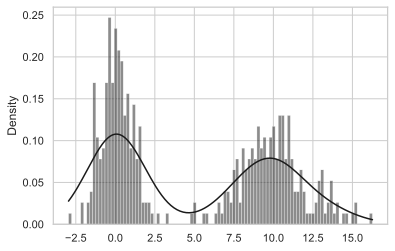

In [42]:
sns.histplot(values, bins=100, color='k', kde=True, stat="density")

### Scatter or Point Plots

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series.

For example, here we load the <u>macrodata.csv</u>, select a few variables, then compute log differences:

In [45]:
macro = pd.read_csv('examples/macrodata.csv')

macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [46]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

trans_data = np.log(data).diff().dropna()
# np.log(): Natural logarithm
# diff(): First discrete difference of element

trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


We can then use seaborn's **regplot** method, which makes a scatter plot and fits a linear regression line:

<AxesSubplot:xlabel='cpi', ylabel='unemp'>

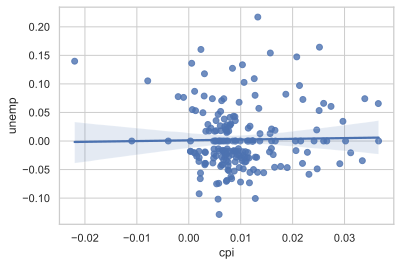

In [48]:
sns.regplot(x='cpi', y='unemp', data=trans_data)

#plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

***

### Conclusion

The goal of this chapter was to get your feet wet with some basic data visualization using **pandas**, **matplotlib**, and **seaborn**.

If visually communicating the results of data analysis is important in your work, I encourage you to seek out resources to learn more about effective data visualization.

It is an active field of research and you can practice with many excellent learning resources available online and in print form.